In [1]:
import collections
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
import math
 


In [17]:
f = open("/Users/davidchen/Documents/GitHub/SomaticSiMu/Reference_genome/Homo_sapiens.GRCh38.dna.chromosome.22.fasta")
s1 = f.read()
data = "".join(s1.split("\n")[1:])

In [18]:
len(data)

50818468

In [30]:
f1 = open("/Users/davidchen/Documents/GitHub/SomaticSiMu/Sample/Breast_AdenoCA/Breast-AdenoCA_End_Stage_Lineage_4.fasta")
s2 = f1.read()
data1 = "".join(s2.split("\n")[1:])

In [31]:
len(data1)

50818465

In [4]:
def count_kmers(sequence, k):
    d = collections.defaultdict(int)
    for i in range(len(data)-(k-1)):
        d[sequence[i:i+k]] +=1
    for key in list(d):
        if "N" in key:
            del d[key]
    return d
 
def probabilities(kmer_count, k):
    probabilities = collections.defaultdict(float)
    N = len(data)
    for key, value in kmer_count.items():
        probabilities[key] = float(value) / (N - k + 1)
    return probabilities
 
def chaos_game_representation(probabilities, k):
    array_size = int(math.sqrt(4**k))
    chaos = []
    for i in range(array_size):
        chaos.append([0]*array_size)
 
    maxx = array_size
    maxy = array_size
    posx = 1
    posy = 1
    for key, value in probabilities.items():
        for char in key:
          
            if char == "T":
                posx += int(maxx / 2)
            elif char == "C":
                posy += int(maxy / 2)
            elif char == "G":
                posx += int(maxx / 2)
                posy += int(maxy / 2)
            maxx = maxx / 2
            maxy /= 2
        chaos[posy-1][posx-1] = value
        maxx = array_size
        maxy = array_size
        posx = 1
        posy = 1
 
    return chaos
 

In [35]:
def plot_cgr(kmer, data):
    f = count_kmers(data, kmer)
    f_prob = probabilities(f, kmer)
    chaos_k = chaos_game_representation(f_prob, kmer)
    
    fig = plt.figure(figsize=(100,100))
    ax = fig.add_subplot(111)

    #ax.set_title('Chaos game representation for ' + str(kmer) + '-mers')
    ax.imshow(chaos_k, interpolation='nearest', cmap=cm.gray_r)


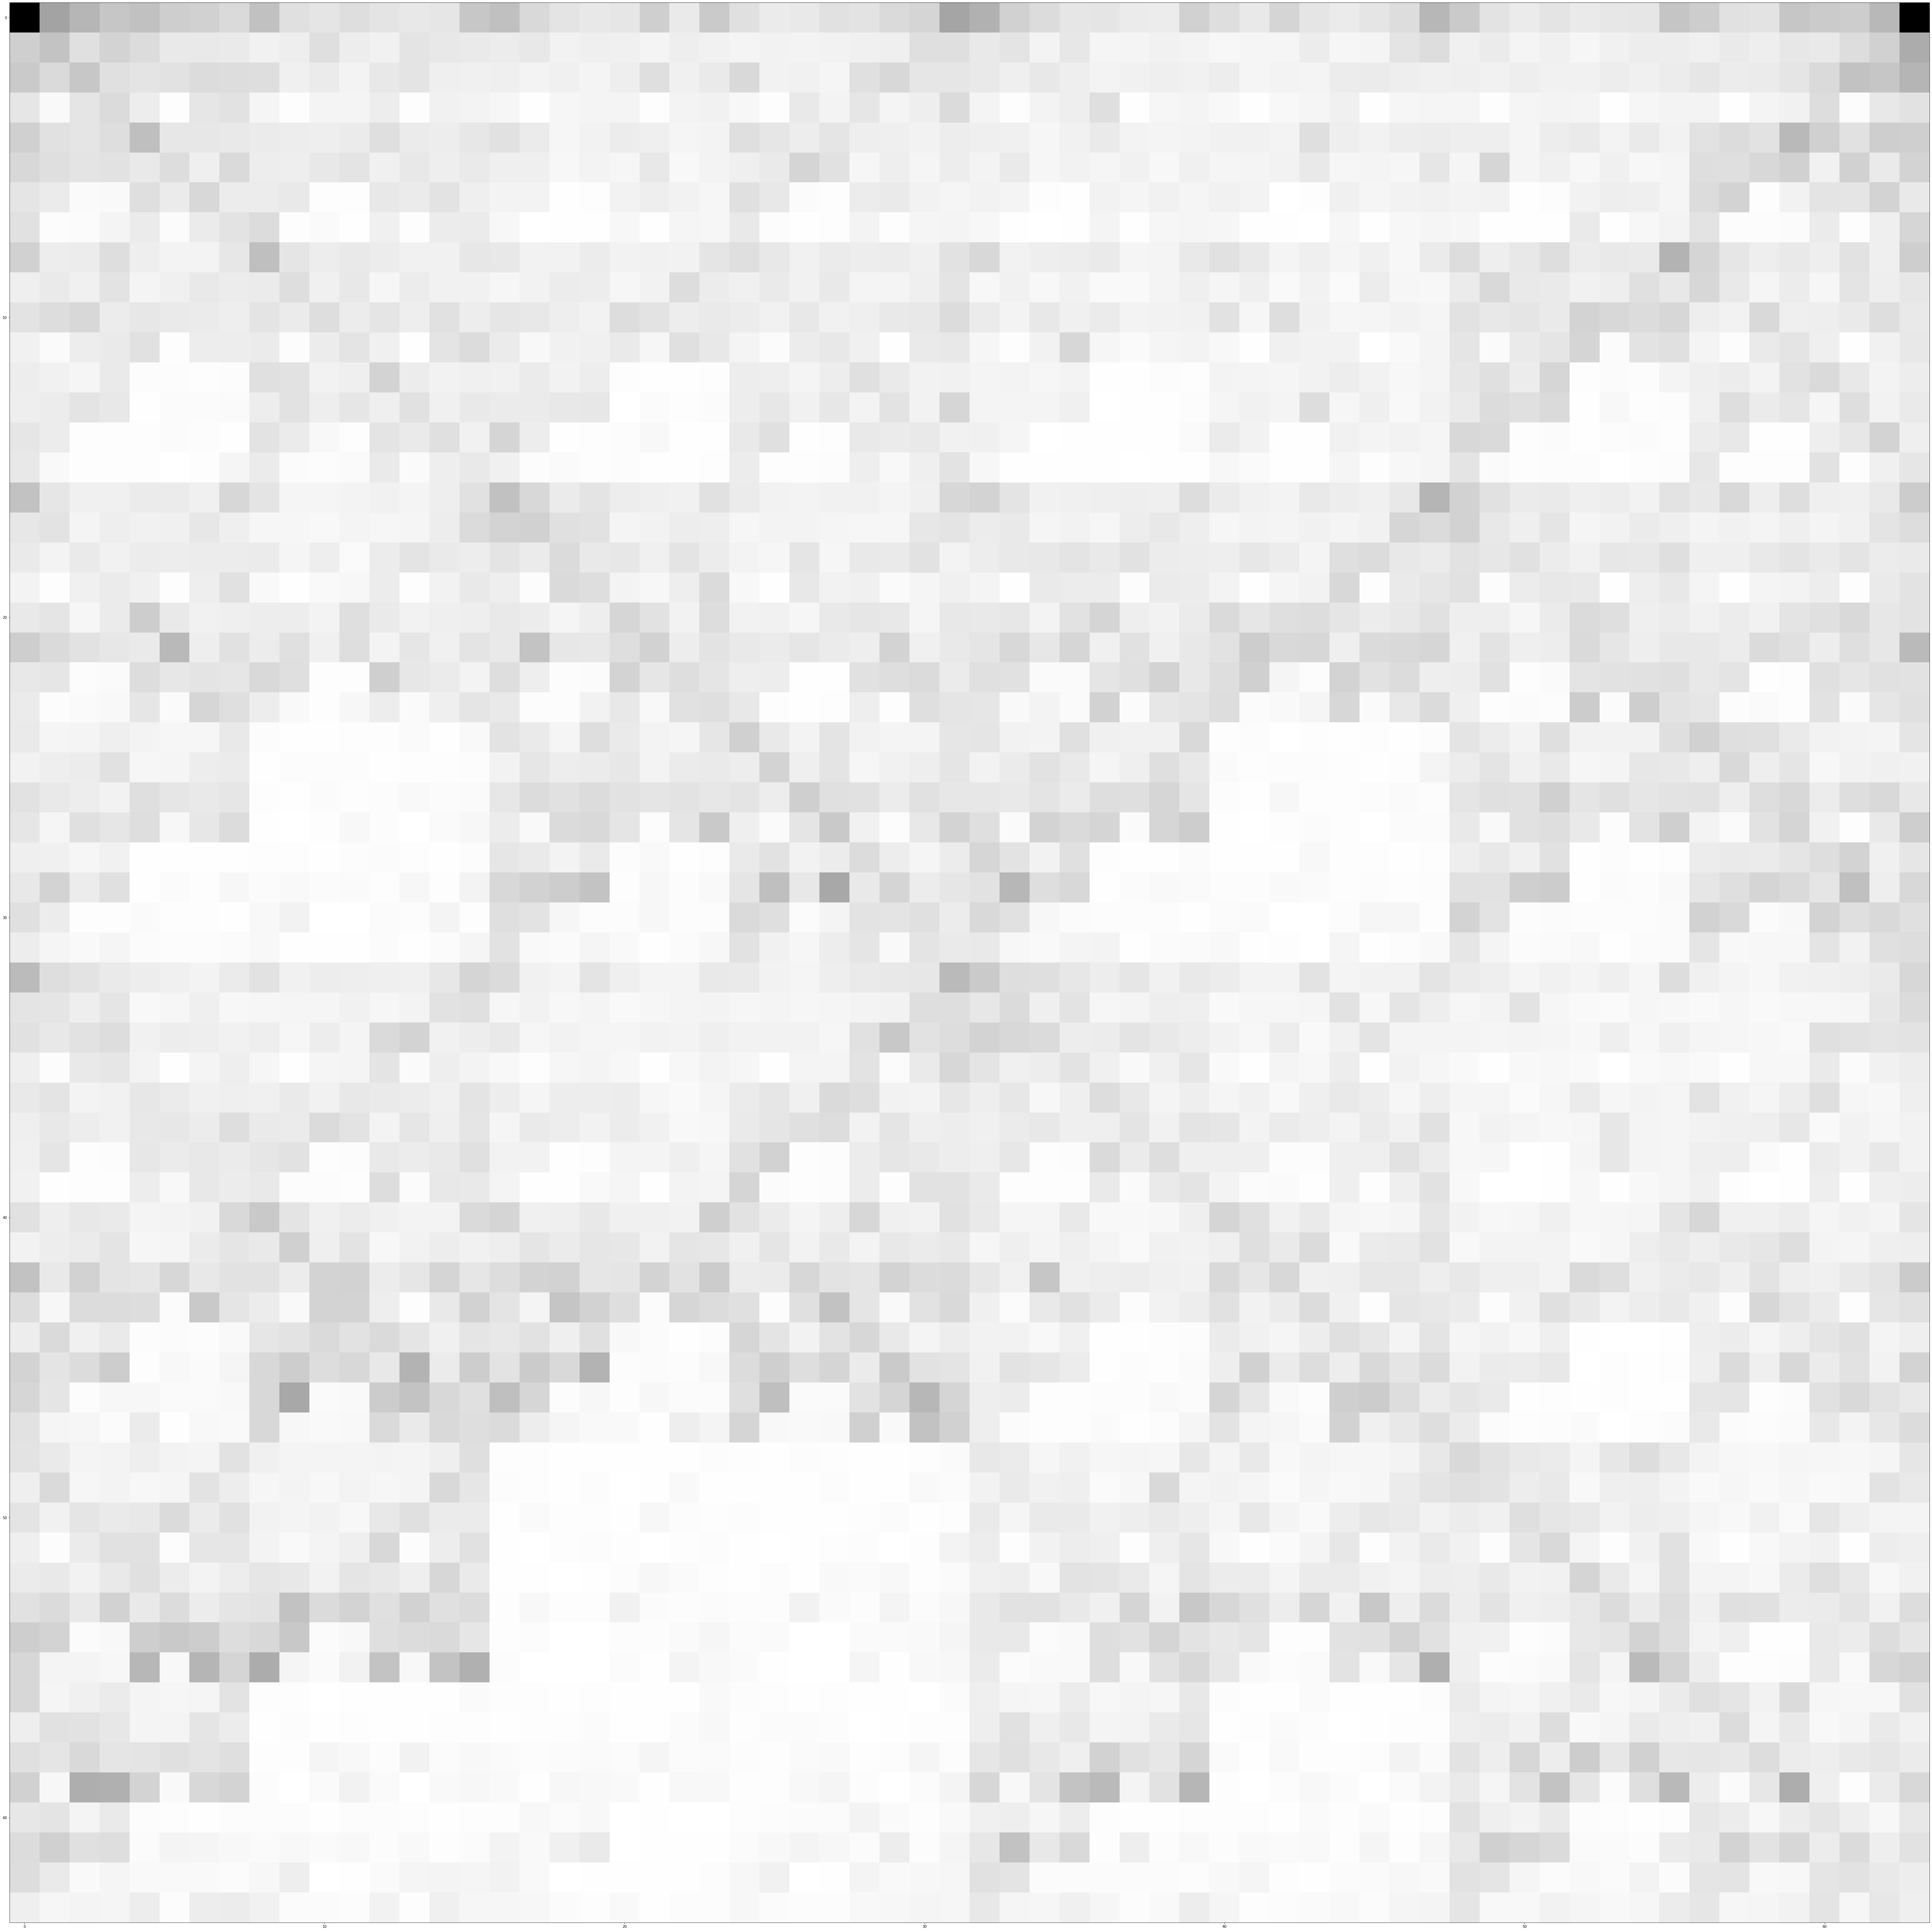

In [36]:
plot_cgr(kmer=6, data=data)

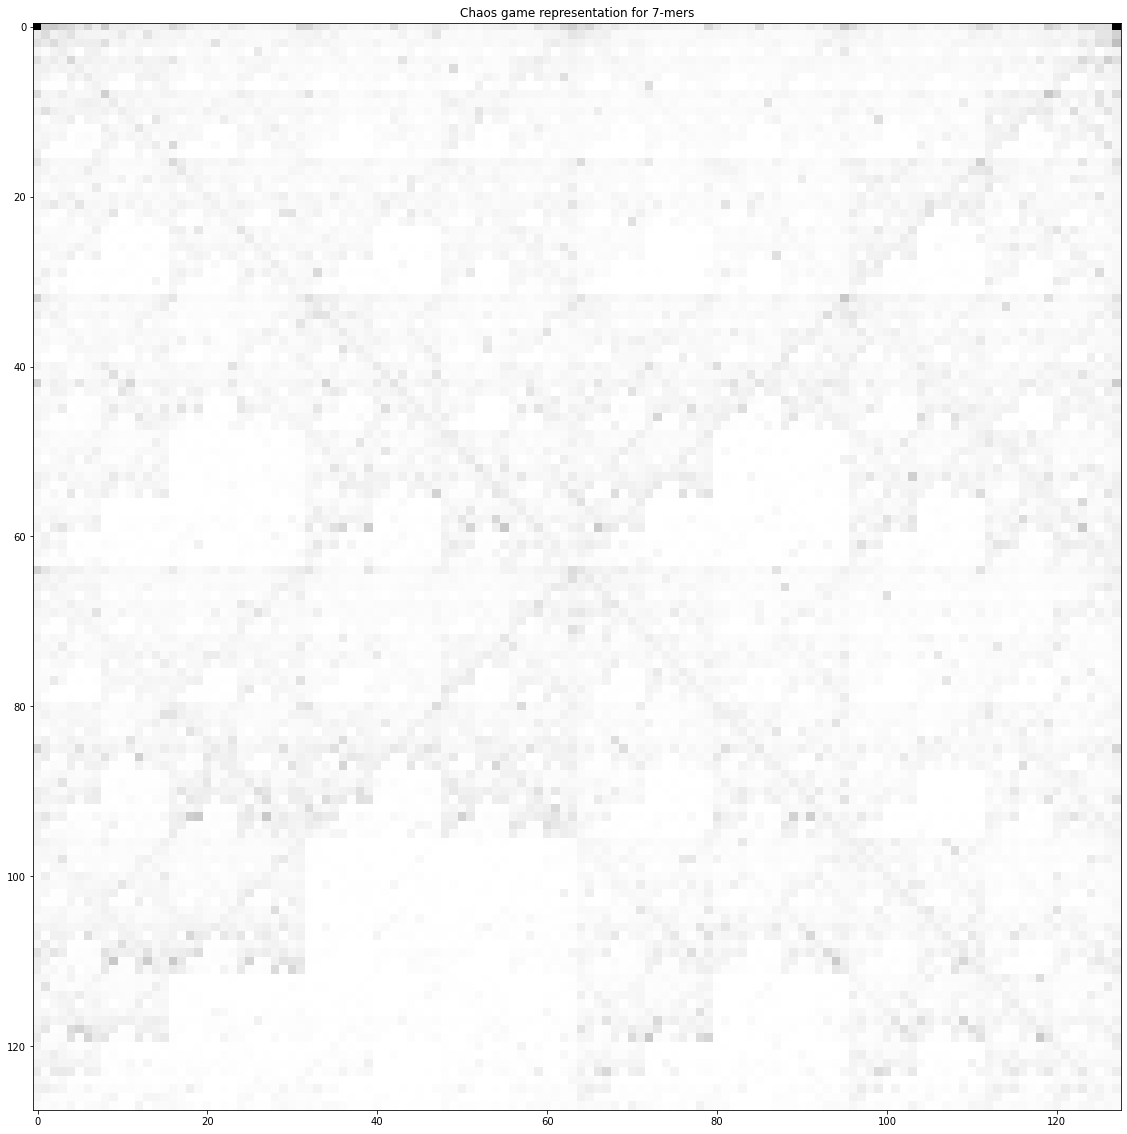

In [33]:
plot_cgr(kmer=7, data=data1)